In [72]:
from sklearn import datasets,preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [73]:
cancer_dataset = datasets.load_breast_cancer()
cancer_dataset.DESCR.split("\n")

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features w

In [74]:
x = cancer_dataset.data
y = cancer_dataset.target

In [75]:
df = pd.DataFrame(x)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [107]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)

In [77]:
scaler = preprocessing.StandardScaler()

In [78]:
scaler.fit(x_train)

StandardScaler()

In [79]:
x_train_scaled = scaler.transform(x_train)

In [80]:
x_train_scaled.shape

(426, 30)

In [81]:
x_train_scaled = np.append(x_train_scaled,np.ones(x_train_scaled.shape[0]).reshape(-1,1),axis =1)

In [82]:
x_train_scaled.shape,x_train_scaled[0].shape

((426, 31), (31,))

In [83]:
def sigmoid(agg):
    return 1/(1+np.exp(-agg))

In [84]:
def cost(x_train,y_train,m):
    
    cost_ = 0
    N =x_train.shape[0]
    for i in range(N):
        agg = (x_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -y_train[i]*np.log(h) - (1 - y_train[i])*np.log(1 - h)
        cost_ +=cost
    return cost_

In [85]:
def step_gradient(x_train,y_train,lrate,m):
    
    N= x_train.shape[0]
    slope_m = np.zeros(x_train.shape[1])
    for i in range(N):
        agg = (x_train[i]*m).sum()
        h =sigmoid(agg)
        slope_m += (-1/N)*(y_train[i]-h)*x_train[i]
        
    m =m - lrate*slope_m
    return m 

In [94]:
def fit(x_train,y_train,epochs =100,lrate = 0.01):
    m =np.zeros(x_train.shape[1])
    cost_array =[]
    unit = epochs/100
    for i in range(epochs):
        m = step_gradient(x_train,y_train,lrate,m)
        cost_ = cost(x_train ,y_train,m)
        cost_array.append(cost_)
        
        if i%unit == 0:
            print("Epoch:{}, cost:{}".format(i,cost_))
            
    return m,cost_array

In [97]:
def predict(x_test,m):
    
    y_pred = []
    N = x_test.shape[0]
    
    for i in range(N):
        agg = (x_test[i]*m).sum()
        h =sigmoid(agg)
        
        if h >0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
        return np.array(y_pred)

In [103]:
def accuracy(x_test,y_pred):
    
    correct = 0
    N =y_test.shape[0]
    correct = (y_test==y_pred).sum()
    
    return (correct/N)*100

In [113]:
m,cost_array  = fit(x_train_scaled,y_train,10000,0.01)


Epoch:0, cost:295.19003179735597
Epoch:100, cost:288.0759525118624
Epoch:200, cost:283.5917032591229
Epoch:300, cost:280.6599406916172
Epoch:400, cost:278.6831257932173
Epoch:500, cost:277.3079876843749
Epoch:600, cost:276.32030229986646
Epoch:700, cost:275.58772291720186
Epoch:800, cost:275.0270726081395
Epoch:900, cost:274.58516642203926
Epoch:1000, cost:274.2273779925291
Epoch:1100, cost:273.93072857360346
Epoch:1200, cost:273.679656503332
Epoch:1300, cost:273.46339563765866
Epoch:1400, cost:273.27433087344815
Epoch:1500, cost:273.1069536043344
Epoch:1600, cost:272.9571895057024
Epoch:1700, cost:272.8219598791534
Epoch:1800, cost:272.69889111769953
Epoch:1900, cost:272.5861191855616
Epoch:2000, cost:272.4821557894055
Epoch:2100, cost:272.3857951283857
Epoch:2200, cost:272.2960477112873
Epoch:2300, cost:272.21209250066397
Epoch:2400, cost:272.1332416651849
Epoch:2500, cost:272.05891415175057
Epoch:2600, cost:271.98861553400036
Epoch:2700, cost:271.92192240515055
Epoch:2800, cost:271.

In [99]:
print(m)

[-0.35688027 -0.36215725 -0.3575437  -0.35591145 -0.12387432 -0.13933082
 -0.31112366 -0.36621024 -0.08320946  0.15084959 -0.34723923 -0.00613323
 -0.30109031 -0.32774931 -0.00823994  0.06069954  0.05035866 -0.0814065
  0.03010651  0.16402854 -0.43795988 -0.42678314 -0.4248633  -0.42019334
 -0.29760017 -0.20499222 -0.31636346 -0.40175439 -0.27250803 -0.09027009
  0.29744195]


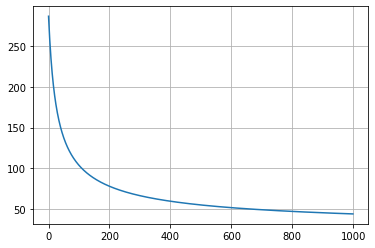

In [104]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [105]:
y_pred_train = predict(x_train_scaled,m)

In [108]:
accuracy(y_train,y_pred_train)

62.93706293706294

In [109]:
x_test_scaled = scaler.transform(x_test)

In [110]:
x_test_scaled = np.append(x_test_scaled,np.ones(x_test_scaled.shape[0]).reshape(-1,1),axis = 1)

In [111]:
y_pred_test = predict(x_test_scaled,m) 

In [112]:
accuracy(y_test,y_pred_test)

37.06293706293706